In [1]:
from E2_Aux import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans


from sklearn import datasets
from scipy.spatial.distance import cdist
from collections import Counter
# import tensorflow as tf
from sklearn.model_selection import train_test_split

Datasets: Iris e MNIST
===

(150, 4)


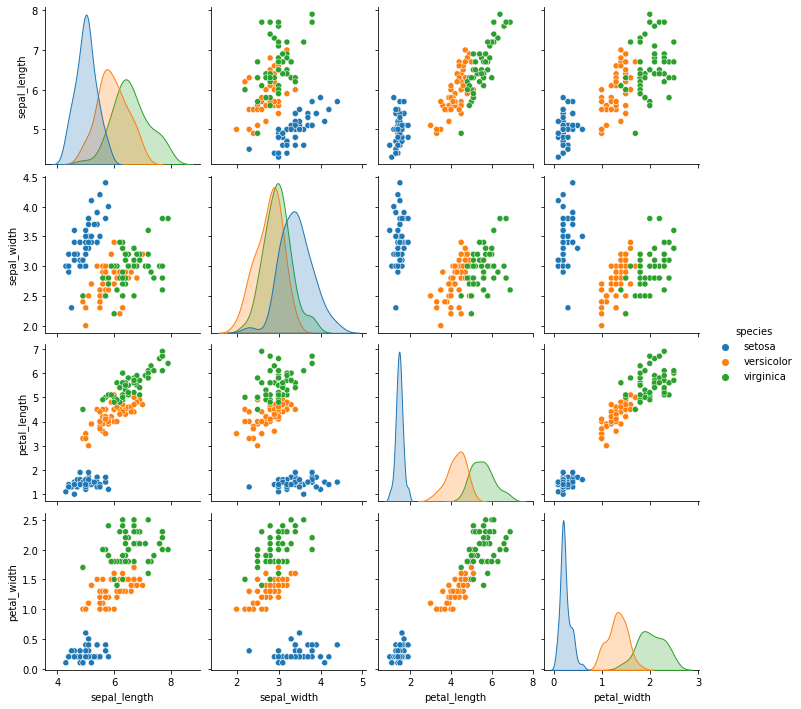

In [5]:
#Iris
iris= pd.read_csv('iris.cvs')
fig = sb.pairplot(iris, hue = 'species') 
# print(iris_data)
#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)
# plt.savefig("Iris.pdf")
plt.show()


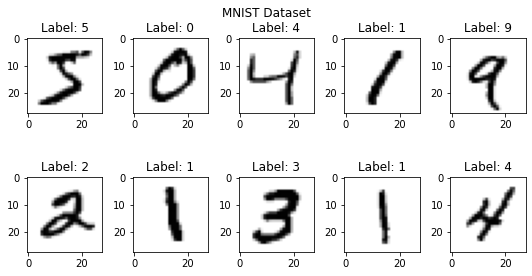

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
#MNIST

#Separando valores de treino e de teste
(x_treino, y_treino), (x, y) = mnist.load_data()

# pick a sample to plot
# sample = 1
# image = x_treino[sample]

# fig = plt.figure
# plt.imshow(image, cmap='gray_r')
# plt.show()
num = 10
images = x_treino[:num]
labels = y_treino[:num]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("MNIST Dataset")
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

print('MNIST Dataset Shape:')
print('X_train: ' + str(x_treino.shape))
print('Y_train: ' + str(y_treino.shape))
print('X_test:  '  + str(x.shape))
print('Y_test:  '  + str(y.shape))


Projeto 4: SOM 
===

Falta:
Revisar a função update_weights aquela definição de raio é meio estranha

Created cortex layer with shape: (20, 20, 28, 28) 

Trained epoch


FileNotFoundError: [Errno 2] No such file or directory: '/images/SOMoutput20.pdf'

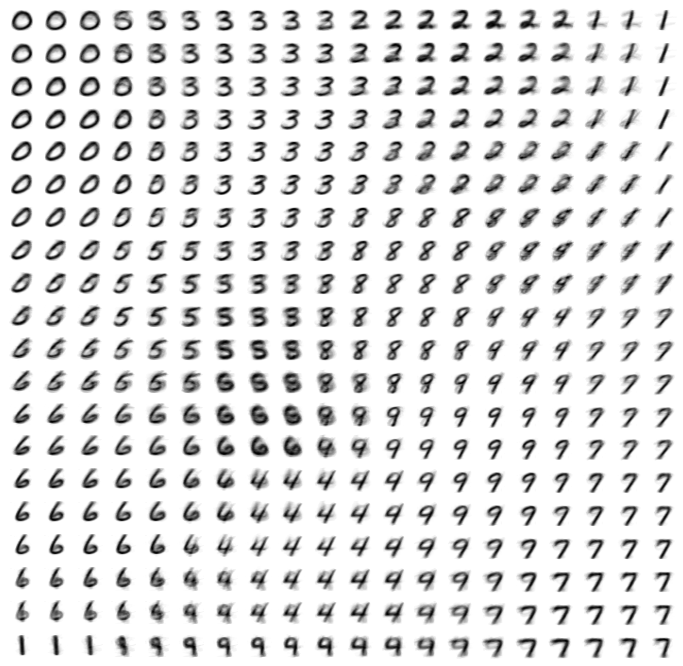

In [130]:
class SOM:
    def __init__(self, input_size=28, dim=(20,20), radius=2, alpha = 0.05, epochs = 1):
        self.dim = dim
        self.input_size = input_size
        self.radius = int(radius)
        self.alpha = float(alpha)
        self.epochs = int(epochs)
        self.cortex = np.random.rand(self.dim[0], self.dim[1], self.input_size, self.input_size)
        self.cortex = np.reshape(self.cortex, (self.dim[0], self.dim[1], self.input_size, self.input_size))
        print("Created cortex layer with shape: %s \n" %(str(self.cortex.shape)))

    def train(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, self.input_size) - self.cortex[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
            self.update_weights(point, vector)
        print('Trained epoch')
        
    def update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= self.dim[0]:
                return False
            elif point[1] < 0 or point[1] >= self.dim[1]:
                return False
            return True
        
        x_diff = -self.radius
        
        # update the weights in the points inside the radius
        while x_diff <= self.radius:
            y_diff = -self.radius
            
            while y_diff <= self.radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, self.input_size) - self.cortex[point[0]+x_diff][point[1]+y_diff]
                    self.cortex[point[0]+x_diff][point[1]+y_diff] += self.alpha * delta
                y_diff += 1
            x_diff += 1
            
    def show(self):
        self.fig, self.axis = plt.subplots(self.dim[0], self.dim[1], figsize= (12,12))
        plt.axis('off')
        plt.xticks(color='w')
        plt.yticks(color='w')

        for i in range(self.dim[0]):
            for j in range(self.dim[1]):
                self.axis[i, j].imshow(self.cortex[i][j], aspect='auto', cmap='gray_r')

        i=0
        for row in self.axis:
            j=0
            for columns in row:
                columns.imshow(self.cortex[i][j], aspect = 'auto', cmap='gray_r')
                columns.axis('off')
                j += 1
            i += 1
            
        plt.savefig("SOMoutput"+str(self.dim[0])+".pdf", quality = 95)
        plt.show()

# generating the SOM network
mnist_SOM = SOM()
mnist_SOM.train(x_treino)
mnist_SOM.show()

Projeto 5: K-means e K-nn
===


## K-vizinhos

NameError: name 'plt' is not defined

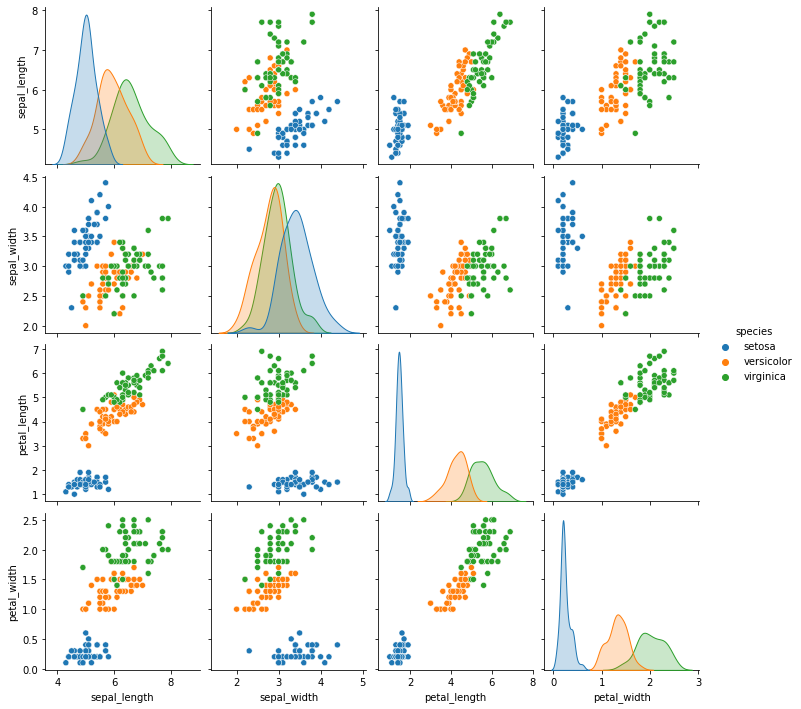

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import seaborn as sb



class k_vizinhos:
    def __init__(self, k, trainData, trainLabels):
        self.k = k
        self.trainData, self.trainLabels = trainData, trainLabels
        
    def predict(self, X):
        y_pred = [self.calc(x) for x in X]
        return np.array(y_pred)
    
    
    def calc(self, x):
        # Calculando as distâncias relativas para os novos pontos
        distances = [self.Dist(x, x_train) for x_train in self.trainData]
        # Obtendo os primeros k vizinhos
        index = np.argsort(distances)[:self.k]
        labels = [self.trainLabels[i] for i in index]  
        # Selecionando o melhor candidato:
        best_fit = Counter(labels).most_common(1)
        return best_fit[0][0]
    
    def Dist(self, r1, r2):
        return np.sqrt(np.sum((r1 - r2)**2))
    


    # Visualization
    fig = sb.pairplot(sb.load_dataset("iris"), hue = 'species') 

plt.show()

X, y = iris.data, iris.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=666)

Iris_knn = k_vizinhos(3, X_train, y_train)
predictions = Iris_knn.predict(X_test)

print(confusion_matrix(y_test, predictions))

In [85]:
# Para o MNIST
from sklearn import datasets
data_mnist = datasets.load_digits()
data = data_mnist.images.reshape((len(data_mnist.images), -1))

X_train, X_test, y_train, y_test = train_test_split(data, data_mnist.target, test_size=0.5)


mnist_knn = k_vizinhos(3,X_train, y_train)
predictions = mnist_knn.predict(X_test)

print(confusion_matrix(y_test, predictions))


[[83  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 92  0  0  0  0  0  0  0]
 [ 0  0  0 95  0  1  0  1  1  0]
 [ 0  0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0  0 88  1  0  0  0]
 [ 0  0  0  0  0  0 88  0  0  0]
 [ 0  0  0  0  0  0  0 93  0  0]
 [ 0  1  0  0  0  0  0  0 81  0]
 [ 0  1  0  1  0  1  0  0  1 92]]


## K-médias

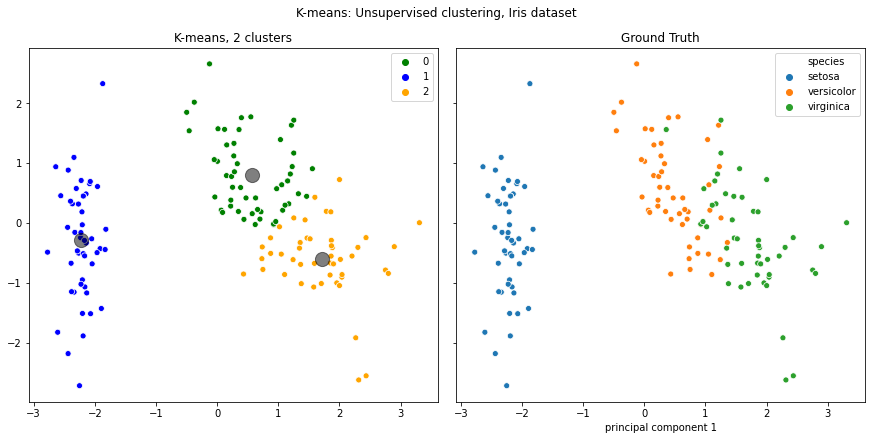

Matrix de Confusão:
[[39  0 11]
 [ 0 50  0]
 [14  0 36]]


In [5]:
#K-means
fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)
fig.suptitle("K-means: Unsupervised clustering, Iris dataset")
X = Data_2D.iloc[:, 0:2].values
# print(X)
kms3 = KMeans(n_clusters=3)
kms3.fit(X)
cluster = kms3.predict(X)
sb.scatterplot(X[:, 0], X[:, 1], hue=cluster, ax = ax[0], palette= ['green', 'blue', 'orange' ])

centers = kms3.cluster_centers_
# print(cluster.shape)
ax[0].set_title("K-means, 2 clusters")
ax[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax[1].set_title("Ground Truth")
sb.scatterplot(Data_2D['principal component 1'],Data_2D['principal component 2'], ax = ax[1], hue = Data_2D['species'])
plt.show()

y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
y_true = np.array(y_true, dtype= 'int64')

print("Matrix de Confusão:")
print(confusion_matrix(y_true, cluster))

Digitos presentes: 10 



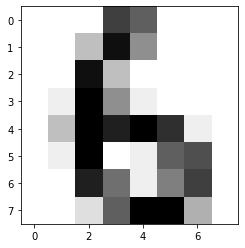

In [129]:
#K-means
from sklearn import datasets
data_mnist = datasets.load_digits()
data = data_mnist.images.reshape((len(data_mnist.images), -1))

X_train, X_test, y_train, y_test = train_test_split(data, data_mnist.target, test_size=0.5, shuffle = True)

n_digits = len(np.unique(y_test))
print("Digitos presentes: %s \n"%n_digits)

kms_mnist = KMeans(n_clusters=n_digits)
kms_mnist.fit(X_train)
cluster = kms_mnist.predict(X_test)

centers = kms_mnist.cluster_centers_

# pick a sample to plot
sample = 10
image = X_test[sample]
image = image.reshape(8,8)
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

In [125]:
# Como o método é não-supervisionado tive que chegar manualmente nos valores corretos das labels 
print("Matrix de Confusão:")
print(confusion_matrix(y_test, cluster_correct))

10
Matrix de Confusão:
[[74  0  0  0  0  0  0  0  0  0]
 [ 0 75 13  0  0  1  1  0  0  0]
 [ 1  3 77  0  0  0  0  1 10  2]
 [ 0  0  0  0  0  0  0  1 31 67]
 [ 0  6  0  0 84  0  0  7  0  0]
 [ 0  0  0  0  1 70  2  0  0 19]
 [ 0  1  0  0  0  0 93  0  0  0]
 [ 0  2  0  0  0  0  0 83  0  0]
 [ 0 19  1  0  0  3  0  3 58  0]
 [ 0 11  0  0  0  0  0  5  3 70]]


# Projeto 6: Redes Complexas

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


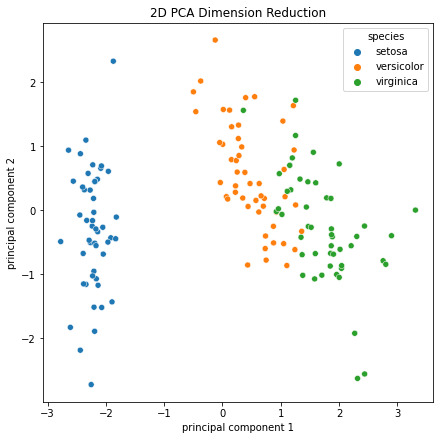

In [8]:
#Normalização dos dados e redução de dimensionalidade com o PCA:
data = iris_data.values
#Normalização
x = StandardScaler().fit_transform(data)


#PCA
K = np.cov(x.T)
# print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
fig, ax = plt.subplots(1, 1,figsize=(6,6),constrained_layout=True)
sb.scatterplot(Data_2D['principal component 1'],Data_2D['principal component 2'], hue = Data_2D['species'], ax=ax)
plt.title("2D PCA Dimension Reduction")
plt.show()


In [28]:
#matriz de adjacencia W
def Adj_matrix(data):
    n = len(data[0])
    W = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            # a distancia de um nó com ele mesmo é zero, portanto:
            if i!=j:
                d = np.sum([(data[row][i]-data[row][j])**2 for row in range(len(data))])
                d = 1/(np.sqrt(d)+0.0001) # para evitar divisões por zero
                W[i,j] = d
    return W
# Matriz de grau D
def Degree_matrix(W):
    D = np.zeros(W.shape)
    for i in range(len(W)):
        D[i,i] = np.sum(W[i,:])
    return D


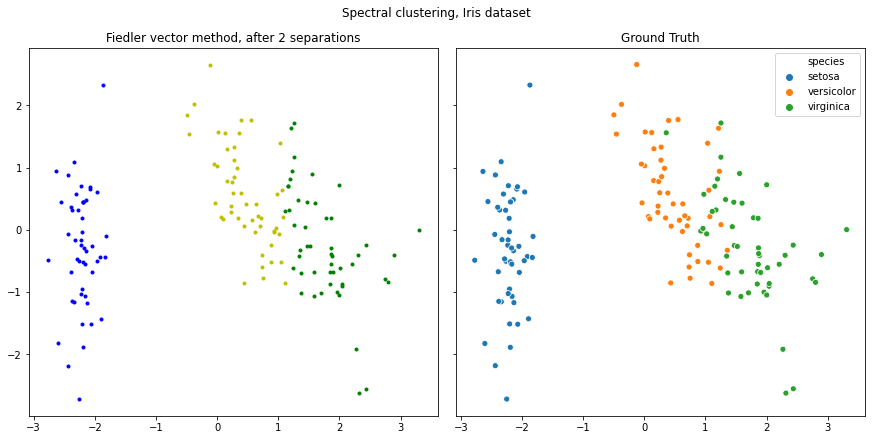

In [38]:

def Spectral(data):
    W = Adj_matrix(data) 
    D = Degree_matrix(W)      
    # Calculando a matriz laplaciana
    L = D-W
    # Calculando os autovalores e autovetores:
    e, v = np.linalg.eig(L)
    
    eigen= pd.DataFrame(data=v,columns=e)
    eigen= eigen.reindex(sorted(eigen.columns), axis=1)
    Fiedler= pd.DataFrame(data=[eigen[eigen.columns[1] ].values],columns=range( len(eigen[eigen.columns[1] ].values) ),index=[0])
    Fiedler= Fiedler.sort_values(by=0, axis=1)
    return Fiedler

F1 = Spectral(principal_comp[:2])
F2 = Spectral(np.array([principal_comp[0][50:], principal_comp[0][50:]]))

fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)
fig.suptitle("Spectral clustering, Iris dataset")

x, y = principal_comp[0], principal_comp[1]
ax[0].plot([x[i] for i in F1.columns[0:50]] ,[y[i] for i in F1.columns[0:50]],'b.')0
ax[0].plot([x[50+i] for i in F2.columns[0:50]] ,[y[50+i] for i in F2.columns[0:50]],'g.')1
ax[0].plot([x[50+i] for i in F2.columns[50:]] ,[y[50+i] for i in F2.columns[50:]],'y.')2



ax[0].set_title("Fiedler vector method, after 2 separations")
ax[1].set_title("Ground Truth")
sb.scatterplot(x,y, ax = ax[1], hue = Data_2D['species'])
plt.show()

In [42]:
#matrix de confusão

labels = np.zeros(150, dtype= 'int64')
for i in F1.columns[0:50]:
    labels[i] = 0
for i in F2.columns[0:50]:
    labels[i+50] = 1
for i in F2.columns[50:]:
    labels[50+i] = 2
    
y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 2
y_true[y_true=='setosa']= 0
y_true[y_true=='virginica']= 1
#Type match
y_true = np.array(y_true, dtype='int64')

print("Matrix de confusão")
y_pred = labels
print(confusion_matrix(y_true, y_pred))
print("\n\n")


Matrix de confusão
[[50  0  0]
 [ 0 45  5]
 [ 0  5 45]]





O algoritimo tem resultados melhores do que o K-means pois leva em conta a separação relativa dos pontos